# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import streamlit as st
import pickle  #to load a saved model
import base64  #to open .gif files in streamlit app
from PIL import Image

In [2]:
#HOME PAGE
@st.cache(suppress_st_warning=True)
def get_fvalue(val):
    feature_dict = {"No":1,"Yes":2}
    for key,value in feature_dict.items():
        if val == key:
            return value

def get_value(val,my_dict):
    for key,value in my_dict.items():
        if val == key:
            return value

app_mode = st.sidebar.selectbox('Select Page',['Home','Sentiment Analysis','Prediction']) #two pages

2023-01-19 16:01:02.766 
  command:

    streamlit run C:\Users\Mohammed Faisal khan\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## 1. For Home Page

In [3]:
#DATASET
if app_mode=='Home':
    st.title('HOTEL RATING CLASSIFICATION')
    st.markdown('Text Mining is the process of deriving meaningful information from natural language text.')
    st.image('image.jpeg',width=600)
    st.header('1. Dataset')
    review_rating=pd.read_excel('hotel_reviews.xlsx')
    
    st.write(review_rating)
    st.markdown('The Overall Goal is to turn the texts into data for analysis via application of Natural Language Processing (NLP)')

## 2. Data Visualization

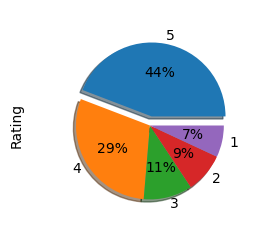

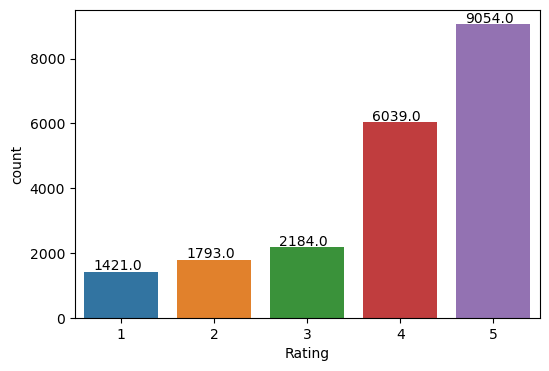

In [4]:
if app_mode=='Home':
    st.header('2. Visualization of Our Hotel Ratings')
    
    #Piechart
    fig1 = plt.figure(figsize=(3,3))
    highlight =(0.1,0,0,0,0)
    review_rating['Rating'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True,explode=highlight,radius=0.8)
    plt.show()

    st.write(fig1)
    st.markdown('From the above pie chart as we can see that the Highest ratings for a Hotel from customers had got Rating of 5 Stars with 44% and Rating of 4 Stars with 29%.')
    
    #Countplot
    fig2 = plt.figure( figsize=(6,4))
    ax = sns.countplot(x='Rating', data=review_rating)
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))
      
    st.write(fig2)
    st.markdown('From the given countplot as we can see that the 9054 customers had given rating 5 star and 6039 customers had given stars.')

## 3. Text Analysis

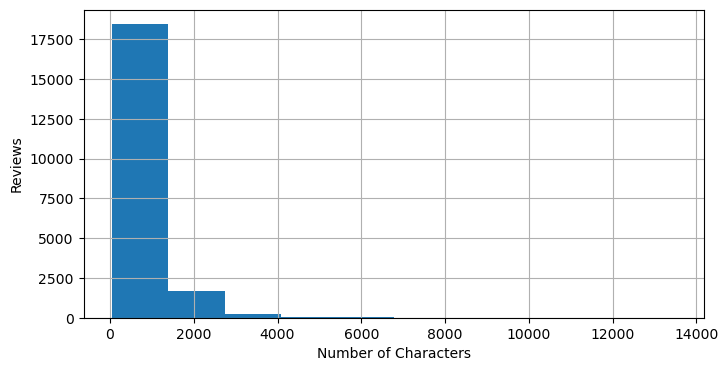

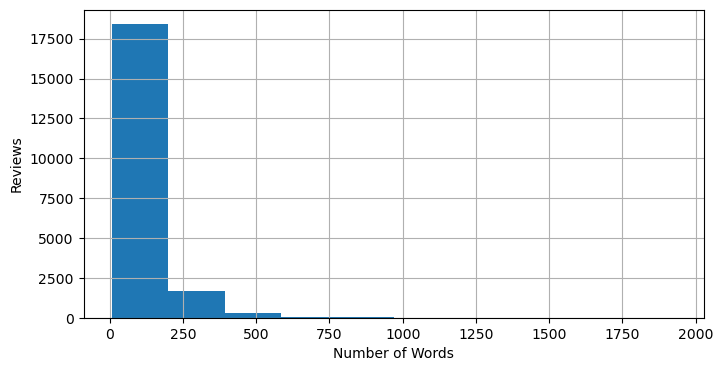

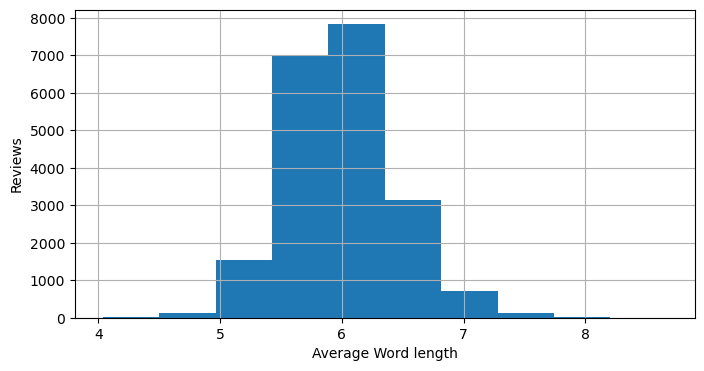

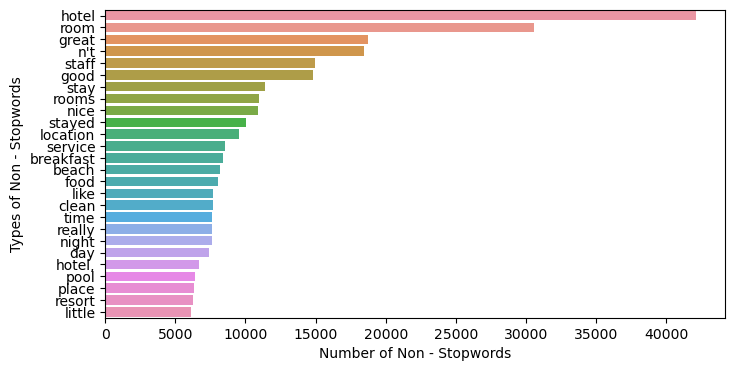

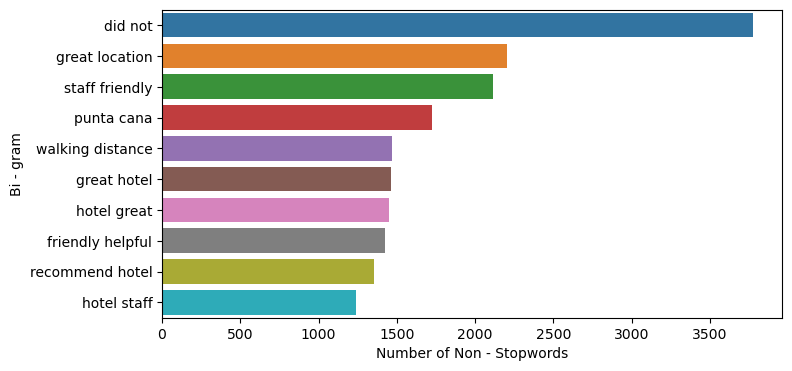

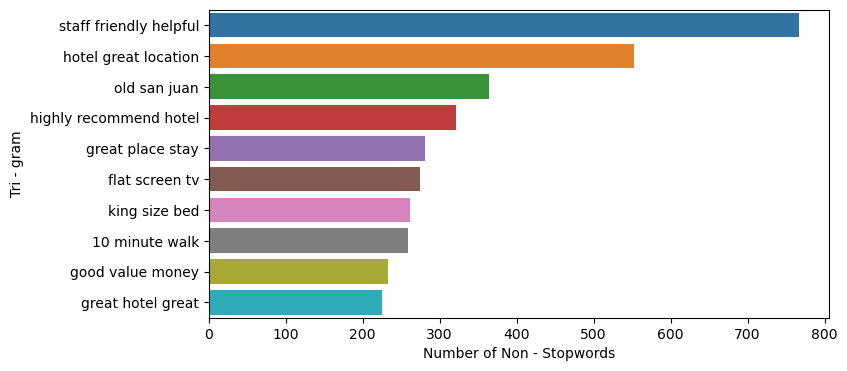

In [5]:
if app_mode=='Home':
    st.header('3. Analysing text statistics')
    st.markdown('Text statistics visualizations are simple but very insightful techniques and those really helps to explore the fundamental characteristics of the text data.')
    
    #1
    st.subheader('A) Number of Characters Present in Each Sentence of Reviews :')
    fig3 = plt.figure(figsize = (8,4))
    review_rating['Review'].str.len().hist()
    plt.xlabel('Number of Characters')
    plt.ylabel('Reviews')
    plt.show()
    
    st.write(fig3)
    st.markdown('The histogram shows that Hotel Reviews range from 1 to 6000 characters and generally more it is b/w 1 to 2000 characters.')
    
    #2
    st.subheader('B) Number of Words Appearing in Each Hotel Reviews :')
    def plot_word_number_histogram(text):
        text.str.split().\
            map(lambda x: len(x)).\
            hist()
    fig4 = plt.figure(figsize = (8,4))
    plot_word_number_histogram(review_rating['Review'])
    plt.xlabel('Number of Words')
    plt.ylabel('Reviews')
    plt.show()
    
    st.write(fig4)
    st.markdown('It is clear that the number of words in Hotel Reviews ranges from 1 to 750 and mostly falls b/w 1 to 250 words.')
    
    #3
    st.subheader('C) Check the Average Word Length in Each Sentence :')
    def plot_word_length_histogram(text):
        text.str.split().\
            apply(lambda x : [len(i) for i in x]). \
            map(lambda x: np.mean(x)).\
            hist()
    fig5 = plt.figure(figsize = (8,4))
    plot_word_length_histogram(review_rating['Review'])
    plt.xlabel('Average Word length')
    plt.ylabel('Reviews')
    plt.show()
    
    st.write(fig5)
    st.markdown('The average word length ranges b/w 4 to 8 with 6 being the most common length it means that people are using really short words in Hotel Reviews. Now lets find out!')
    
    #4
    st.subheader('D) Word - Level Analysis :')
    st.markdown('Now we are using counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in NLP.')
    import seaborn as sns
    from nltk.corpus import stopwords
    from collections import  Counter
    def plot_top_non_stopwords_barchart(text):
        stop=set(stopwords.words('english'))

        new= text.str.split()
        new=new.values.tolist()
        corpus=[word for i in new for word in i]

        counter=Counter(corpus)
        most=counter.most_common()
        x, y=[], []
        for word,count in most[:30]:
            if (word not in stop):
                x.append(word)
                y.append(count)

        sns.barplot(x=y,y=x)
        
    fig6 = plt.figure(figsize = (8,4))
    plot_top_non_stopwords_barchart(review_rating['Review'])
    plt.xlabel('Number of Non - Stopwords')
    plt.ylabel('Types of Non - Stopwords')
    plt.show()
    
    st.write(fig6)
    st.markdown('The Hotel, room, great, staff etc. dominate the most words used by customers while giving the Hotel Reviews.')
    
    #5
    st.subheader('E) Bigram Exploration = 2 Words :')
    from nltk.corpus import stopwords
    from sklearn.feature_extraction.text import CountVectorizer
    from collections import  Counter
    def plot_top_ngrams_barchart(text, n=2):
        stop=set(stopwords.words('english'))

        new= text.str.split()
        new=new.values.tolist()
        corpus=[word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0) 
            words_freq = [(word, sum_words[0, idx]) 
                          for word, idx in vec.vocabulary_.items()]
            words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
            return words_freq[:10]

        top_n_bigrams=_get_top_ngram(text,n)[:10]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x)
        
    fig7 = plt.figure(figsize = (8,4))    
    plot_top_ngrams_barchart(review_rating['Review'],2)
    plt.xlabel('Number of Non - Stopwords')
    plt.ylabel('Bi - gram')
    plt.show()
    
    st.write(fig7)
    st.markdown('We can observe that the bigrams such as great location, staff friendly that are related to Hotel dominate the Hotel Reviews.')
    
    #6
    st.subheader('F) Trigram Exploration = 3 Words :')
    fig8 = plt.figure(figsize = (8,4))
    plot_top_ngrams_barchart(review_rating['Review'],3)
    plt.xlabel('Number of Non - Stopwords')
    plt.ylabel('Tri - gram')
    plt.show()
    
    st.write(fig8)
    st.markdown('We can observe that the bigrams such as staff friendly helpful, hotel great location that are related to Hotel dominate the Hotel Reviews. It means that we should do some data cleaning Process and see if we are able to combine those related terms into one clean token.')
    
     

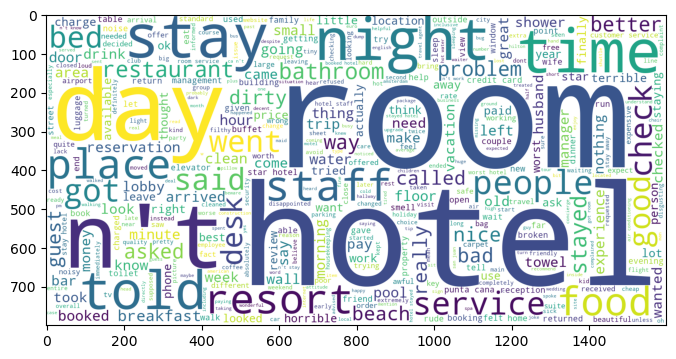

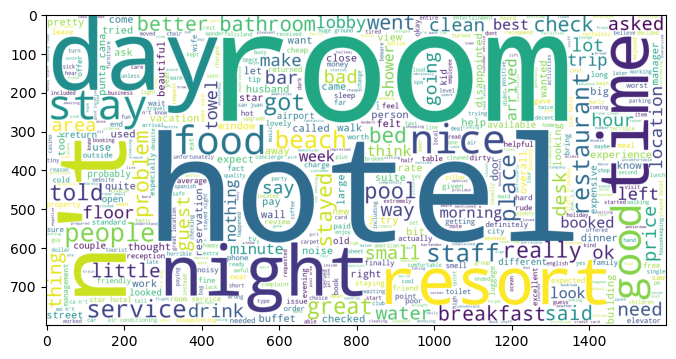

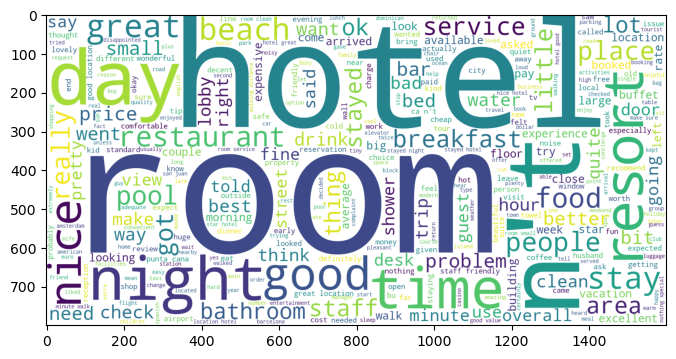

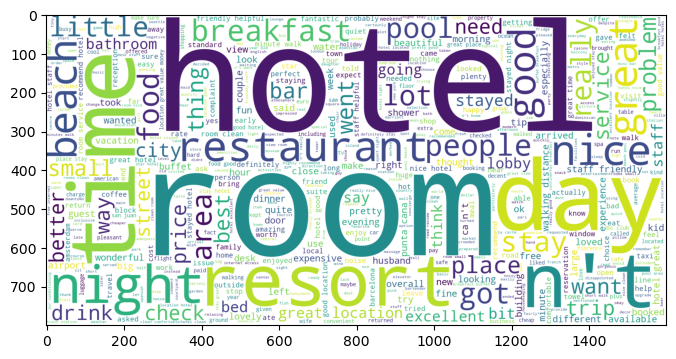

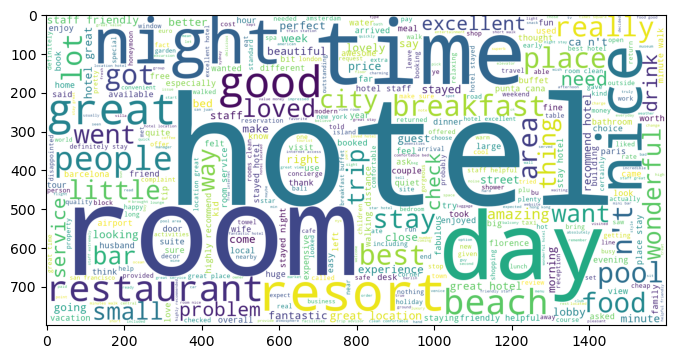

In [6]:
if app_mode=='Home':
    st.header('4. Generating Word Cloud For Hotel Rating')
    st.markdown('Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.')
    
    #1
    st.subheader('A) For 1 Star Rating :')
    from wordcloud import WordCloud
    w1 = plt.figure(figsize=(8,8))
    wc_1 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==1].Review))
    plt.imshow(wc_1)
    plt.show()
    
    st.write(w1)
    
    #2
    st.subheader('B) For 2 Star Rating :')
    w2 = plt.figure(figsize=(8,8))
    wc_2 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                    background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==2].Review))
    plt.imshow(wc_2)
    plt.show()
    
    st.write(w2)
    
    #3
    st.subheader('C) For 3 Star Rating :')
    w3 = plt.figure(figsize=(8,8))
    wc_3 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                    background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==3].Review))
    plt.imshow(wc_3)
    plt.show()
    
    st.write(w3)
    
    #4
    st.subheader('D) For 4 Star Rating :')
    w4 = plt.figure(figsize=(8,8))
    wc_4 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==4].Review))
    plt.imshow(wc_4)
    plt.show()
    
    st.write(w4)
    
    #5
    st.subheader('E) For 5 Star Rating :')
    w5 = plt.figure(figsize=(8,8))
    wc_5 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
                background_color="white").generate(" ".join(review_rating[review_rating["Rating"]==5].Review))
    plt.imshow(wc_5)
    plt.show()
    
    st.write(w5)

## 4. Text Preprocessing 

In [7]:
#1
review_rating_1 = pd.read_excel('hotel_reviews.xlsx')
#2
review_rating_1['Text_Lower'] = review_rating_1['Review'].str.lower()
#3
import string
review_rating_1.drop(['Review'], axis=1, inplace=True)
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

review_rating_1['Text_Removal_punctuations'] = review_rating_1['Text_Lower'].apply(lambda text: remove_punctuation(text))
#4
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
review_rating_1.drop(['Text_Lower'], axis=1, inplace=True)
#6
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

review_rating_1['Text_Removal_stopwords'] = review_rating_1['Text_Removal_punctuations'].apply(lambda text: remove_stopwords(text))
#5
from collections import Counter
cnt = Counter()
for text in review_rating_1['Text_Removal_stopwords'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common()
review_rating_1.drop(['Text_Removal_punctuations'], axis=1, inplace=True)

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

review_rating_1['Text_Removal_Frequentwords'] = review_rating_1['Text_Removal_stopwords'].apply(lambda text: remove_freqwords(text))
#6
review_rating_1.drop(['Text_Removal_stopwords'], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

review_rating_1['Text_Removal_Rarewords'] = review_rating_1['Text_Removal_Frequentwords'].apply(lambda text: remove_rarewords(text))
#7
import re
review_rating_1.drop(['Text_Removal_Frequentwords'], axis=1, inplace=True)

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

review_rating_1['Text_Removal_Numbers'] = review_rating_1['Text_Removal_Rarewords'].apply(lambda text: remove_numbers(text))
#8
review_rating_1.drop(['Text_Removal_Rarewords'], axis=1, inplace=True)

def remove_whitespace(text):
    return  " ".join(text.split())

review_rating_1['Text_Removal_Whitespaces']=review_rating_1['Text_Removal_Numbers'].apply(remove_whitespace)
#9
review_rating_1.drop(['Text_Removal_Numbers'], axis=1, inplace=True)

def remove_single_char(text):
    """
    Return :- string after removing single characters
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

review_rating_1['Text_Removal_single_Characters'] = review_rating_1['Text_Removal_Whitespaces'].apply(lambda text: remove_single_char(text))
#10
review_rating_1.drop(['Text_Removal_Whitespaces'], axis=1, inplace=True)

def remove_emojis(text):
    """
    Result :- string without any emojis in it
    Input :- String
    Output :- String
    """
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    without_emoji = emoji_pattern.sub(r'',text)
    return without_emoji

review_rating_1['Text_Removal_Emojis'] = review_rating_1['Text_Removal_single_Characters'].apply(lambda text: remove_emojis(text))
#11
import unidecode
review_rating_1.drop(['Text_Removal_single_Characters'], axis=1, inplace=True)

def accented_to_ascii(text):
    """
    Return :- text after converting accented characters
    Input :- string
    Output :- string
    """
    text = unidecode.unidecode(text)
    return text

review_rating_1['Text_ASCII'] = review_rating_1['Text_Removal_Emojis'].apply(lambda text: accented_to_ascii(text))
#12
review_rating_1.drop(['Text_Removal_Emojis'], axis=1, inplace=True)

def short_to_original(text):
    """
    Return :- text after converting short_form words to original
    Input :- string
    Output :- string
    """
    chat_words_list = []
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

review_rating_1['Text_Covert_Normalwords'] = review_rating_1['Text_ASCII'].apply(lambda text: short_to_original(text))
#13
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
review_rating_1.drop(['Text_ASCII'], axis=1, inplace=True)

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

review_rating_1['Text_Lemmatized'] = review_rating_1['Text_Covert_Normalwords'].apply(lambda text: lemmatize_word(text))
#14
review_rating_1.drop(['Text_Covert_Normalwords'], axis=1, inplace=True)

def listToString(s):
    
    str1 = " " 
    return (str1.join(s))

review_rating_1['Clean_Review']=review_rating_1['Text_Lemmatized'].apply(lambda s: listToString(s))
#15
review_rating_1.drop(['Text_Lemmatized'], axis=1, inplace=True)

new_cols = ['Clean_Review','Rating']
review_rating_1=review_rating_1.reindex(columns=new_cols)

## 5. Sentiment Analysis

In [8]:
if app_mode=='Sentiment Analysis':
    def sentiment(review):
        if review>=3:
            return 'Positive'
        elif review==0:
            return 'Nutral'
        else:
            return 'Negative'
    review_rating_1['Rating_Analysis']= review_rating_1['Rating'].apply(sentiment)
    
    genre = st.sidebar.radio('Select',('Textblob', 'VADER'))

    if genre == 'Textblob':
        st.sidebar.write('You Selected Textblob')
        if st.sidebar.button('Submit'):
            review_rating_SA = review_rating_1.copy()
            from textblob import TextBlob

            #1
            def getSubjectivity(review):
                return TextBlob(review).sentiment.subjectivity

            review_rating_SA['Subjectivity'] = review_rating_SA['Clean_Review'].apply(getSubjectivity)
            
            sub = plt.figure(figsize = (5,3))
            sns.distplot(review_rating_SA['Subjectivity'])
            plt.title('Sentiment Subjectivity Plot')
            plt.show()
        
            st.header('A) Subjectivity')
            st.write(sub)
            st.write('You can see that the Subjectivity mainly ranges between 0 and 1 but the highest Subjectivity ranges between 0.4 to 0.8. This indicates that the majority of the Customers had given Good Opinions about Hotel.')
            
            #2
            def getPolarity(review):
                return TextBlob(review).sentiment.polarity
            
            review_rating_SA['Polarity'] = review_rating_SA['Clean_Review'].apply(getPolarity)
            
            def plot_polarity_histogram(text):
                
                def _polarity(text):
                    return TextBlob(text).sentiment.polarity
                
                pol = plt.figure(figsize = (5,3))
                polarity_score =text.apply(lambda x : _polarity(x))
                polarity_score.hist()
            
                st.header('B) Polarity')
                st.write(pol)
                st.write('You can see that the polarity mainly ranges between -1 and 1 but the highest polarity ranges between 0.00 to 0.50. This indicates that the majority of the Hotel Reviews are Positive.')
            plot_polarity_histogram(review_rating_SA['Clean_Review'])
                
                
                
            def analysis(score):
                if score < 0:
                    return 'Negative'
                elif score == 0:
                    return 'Neutral'
                else:
                    return 'Positive'
                    
            review_rating_SA['Review_Analysis'] = review_rating_SA['Polarity'].apply(analysis)
            def analysis(score):
                if score < 0:
                    return '0'
                elif score == 0:
                    return '1'
                else:
                    return '2'
                        
            review_rating_SA['Review_Sentiment_1'] = review_rating_SA['Polarity'].apply(analysis)
            Analysis_counts = review_rating_SA.Review_Analysis.value_counts()
            
            ana = plt.figure(figsize = (5,3))
            plt.bar(review_rating_SA.Review_Analysis.value_counts().index,
                    review_rating_SA.Review_Analysis.value_counts())
            plt.title('Plot of [Positive - Neutral - Negative] Reviews')
            plt.show()
            from sklearn.metrics import accuracy_score,classification_report
            TB_accuracy = accuracy_score(review_rating_SA['Rating_Analysis'],review_rating_SA['Review_Analysis'])
            print(classification_report(review_rating_SA['Rating_Analysis'],review_rating_SA['Review_Analysis']))
                        
            st.header('C) Analyzing the Reviews for Textblob')
            st.write(ana)
            st.write('Yep 91.3 % of Reviews is Positive with only 8.4 % of Negative and 0.3 % of Neutral.')
            st.write('Accuracy of Textblob',TB_accuracy)
            st.write('Analysis Counts',Analysis_counts)
            st.write('Classification Report')
            st.write(classification_report(review_rating_SA['Rating_Analysis'],review_rating_SA['Review_Analysis']))
            
            a = plt.figure(figsize=(10,5))

            plt.subplot(1,3,1)
            plt.title('TextBlob Results')
            plt.pie(Analysis_counts.values, labels = Analysis_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
            
            st.write(a)
        
    else:
        st.sidebar.write('You Selected VADER')
        if st.sidebar.button('Submit'):
            review_rating_VA = review_rating_1.copy()
            from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
            analyzer = SentimentIntensityAnalyzer()

            def vadersentimentanalysis(review):
                vs = analyzer.polarity_scores(review)
                return vs['compound']

            review_rating_VA['Vader Sentiment'] = review_rating_VA['Clean_Review'].apply(vadersentimentanalysis)
            va = plt.figure(figsize = (5,3))
            sns.histplot(review_rating_VA['Vader Sentiment'])
            plt.title('Vader Sentiment Plot')
            plt.show()
        
            st.header('A) VADER Sentiment')
            st.write(va)
            st.write('You can see that the Vader Sentiment mainly ranges between -1 and 1 but the highest Vader ranges between 0.75 to 1. This indicates that the majority of the Customers had given Good Opinions and positive Reviews about Hotel.')
        
            def vader_analysis(compound):
                if compound >= 0.5:
                    return 'Positive'
                elif compound <= -0.5 :
                    return 'Negative'
                else:
                    return 'Neutral'
                
            review_rating_VA['Review_Analysis'] = review_rating_VA['Vader Sentiment'].apply(vader_analysis)
            def vader_analysis(compound):
                if compound >= 0.5:
                    return '2'
                elif compound <= -0.5 :
                    return '0'
                else:
                    return '1'

            review_rating_VA['Review_Sentiment_2'] = review_rating_VA['Vader Sentiment'].apply(vader_analysis)
            vader_counts = review_rating_VA['Review_Analysis'].value_counts()
            vaa = plt.figure(figsize = (5,3))
            plt.bar(review_rating_VA.Review_Analysis.value_counts().index,
                    review_rating_VA.Review_Analysis.value_counts())
            
            plt.title('Plot of [Positive - Neutral - Negative] Reviews')
            plt.show()
            from sklearn.metrics import accuracy_score,classification_report
            VA_accuracy = accuracy_score(review_rating_VA['Rating_Analysis'],review_rating_VA['Review_Analysis'])
            print(classification_report(review_rating_VA['Rating_Analysis'],review_rating_VA['Review_Analysis']))
            
            st.header('B) Analyzing the Reviews for VADER')
            st.write(vaa)
            st.write('Yep 88.1 % of Reviews is Positive with only 4.6 % of Negative and 7.3 % of Neutral.')
            st.write('Accuracy of VADER',VA_accuracy)
            st.write('Analysis Counts',vader_counts)
            st.write('Classification Report')
            st.write(classification_report(review_rating_VA['Rating_Analysis'],review_rating_VA['Review_Analysis']))
            
            b = plt.figure(figsize=(10,5))
            
            plt.subplot(1,3,2)
            plt.title('VADER Results')
            plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
            plt.show()
            
            st.write(b)

# 6. Model Prediction

In [9]:
if app_mode=='Prediction':
    import nltk
    nltk.download('wordnet')

    import warnings
    from nltk.corpus import stopwords, wordnet
    nltk.download('stopwords')
    import re
    from rake_nltk import Rake
    import pickle
    import streamlit as st
    import numpy as np
    from nltk.stem import WordNetLemmatizer
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt

    # Warnings ignore 
    warnings.filterwarnings(action='ignore')
    st.set_option('deprecation.showPyplotGlobalUse', False)

    # loading the trained model
    pickle_in = open('C:\\Users\\Mohammed Faisal khan\\Deployement_Streamlit\\LGBM_model_deploy.pkl', 'rb') 
    model = pickle.load(pickle_in)

    pickle_in = open('C:\\Users\\Mohammed Faisal khan\\Deployement_Streamlit\\tfid_deploy.pkl', 'rb') 
    vectorizer = pickle.load(pickle_in)
    # Title of the application 
    st.title('Text Analysis\n', )

    input_text = st.text_area("Enter review", height=50)

    # Sidebar options
    option = st.sidebar.selectbox('Please choose',['Sentiment Analysis','Check Keywords','Word Cloud'])
    st.set_option('deprecation.showfileUploaderEncoding', False)
    if option == "Sentiment Analysis":



        if st.button("Predict sentiment"):
            wordnet=WordNetLemmatizer()
            text=re.sub('[^A-za-z0-9]',' ',input_text)
            text=text.lower()
            text=text.split(' ')
            text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
            text = ' '.join(text)
            pickle_in = open('C:\\Users\\Mohammed Faisal khan\\Deployement_Streamlit\\LGBM_model_deploy.pkl', 'rb') 
            model = pickle.load(pickle_in)
            pickle_in = open('C:\\Users\\Mohammed Faisal khan\\Deployement_Streamlit\\tfid_deploy.pkl', 'rb') 
            vectorizer = pickle.load(pickle_in)
            transformed_input = vectorizer.transform([text])

            if model.predict(transformed_input) == -1:
                st.write("Input review has Negative Sentiment : 😔")
            elif model.predict(transformed_input) == 1:
                st.write("Input review has Positive Sentiment : 😀")
            else:
                st.write(" Input review has Neutral Sentiment : 😐")

    elif option == "Check Keywords":
        st.header("Check Keywords")
        if st.button("Check Keywords"):

            r=Rake(language='english')
            r.extract_keywords_from_text(input_text)
            # Get the important phrases
            phrases = r.get_ranked_phrases()
            # Get the important phrases
            phrases = r.get_ranked_phrases()
            # Display the important phrases
            st.write("Below are the keywords:")
            for i, p in enumerate(phrases):
                st.write(i+1, p)
    elif option == "Word Cloud":
        st.header("Word cloud")
        if st.button("Wordcloud"):
            wordnet=WordNetLemmatizer()
            text=re.sub('[^A-za-z0-9]',' ',input_text)
            text=text.lower()
            text=text.split(' ')
            text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
            text = ' '.join(text)
            wordcloud = WordCloud().generate(text)
            plt.figure(figsize=(40, 30))
            plt.imshow(wordcloud) 
            plt.axis("off")

            st.pyplot()        